## Using Iris dataset and predicting the optimum number of clusters and visualizing it.

By- Jivithesh Reddy

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [17]:
iris=pd.read_csv('Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [18]:
iris.shape

(150, 6)

In [19]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [20]:
X=iris.iloc[:,:4]
Y=iris['Species']
X.shape

(150, 4)

In [21]:
x_train,x_test,y_train,y_test=train_test_split(X,Y ,test_size=0.2,random_state=0)
print(len(x_train),len(y_train))

120 120


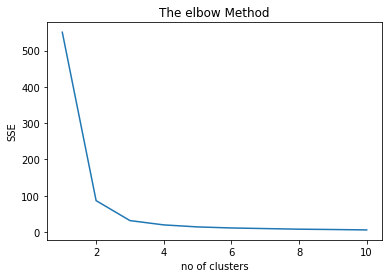

In [27]:
X=iris.iloc[:,[3,4]].values

#using the elbow method to find the optional number of clusters
ls=[]
for i in range(1,11):
    km=KMeans(n_clusters = i)
    km.fit(X)
    ls.append(km.inertia_) #sum of squared distances of samples to their closest cluster center
plt.plot(range(1,11),ls)
plt.title('The elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('SSE')
plt.show()

In [29]:
knn=KNeighborsClassifier(n_neighbors=3)
y_kmeans=knn.fit(x_train,y_train)
print('KNN Score =',knn.score(x_test,y_test)*100)
prediction=knn.predict(x_test)
cm=confusion_matrix(y_test,prediction)
print('Confusion Matrix',cm,sep='\n')

KNN Score = 100.0
Confusion Matrix
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [30]:
prediction

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [32]:
k_list=list(range(1,31))

In [33]:
ls=[]
mis_class=[]
for i in k_list:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    print('KNN Score =',knn.score(x_test,y_test)*100)
    prediction=knn.predict(x_test)
    cm=confusion_matrix(y_test,prediction)
    print('Confusion Matrix',cm,sep='\n')
    ls.append((cm[0][1]+cm[0][2]+cm[1][0]+cm[1][2]+cm[2][0]+cm[2][1])/3)
    mis_class.append(np.mean(prediction !=y_test))

KNN Score = 100.0
Confusion Matrix
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
KNN Score = 100.0
Confusion Matrix
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
KNN Score = 100.0
Confusion Matrix
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
KNN Score = 100.0
Confusion Matrix
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
KNN Score = 100.0
Confusion Matrix
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
KNN Score = 100.0
Confusion Matrix
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
KNN Score = 100.0
Confusion Matrix
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
KNN Score = 100.0
Confusion Matrix
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
KNN Score = 100.0
Confusion Matrix
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
KNN Score = 96.66666666666667
Confusion Matrix
[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
KNN Score = 100.0
Confusion Matrix
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
KNN Score = 100.0
Confusion Matrix
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
KNN Score = 100.0
Confusion Matrix
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
KNN Score = 100.0
Confusion Matrix
[[11  0  0]
 [ 0 

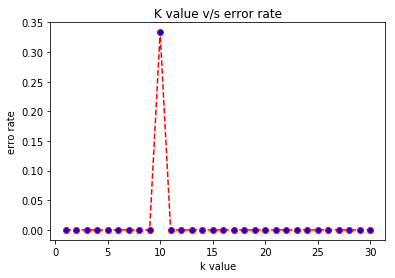

In [34]:
plt.plot(k_list,ls,color='red',linestyle='dashed',marker='o',markerfacecolor='Blue')
plt.title('K value v/s error rate')
plt.xlabel('k value')
plt.ylabel('erro rate')
plt.show()